# Part 1: Models with default parameters

### 1.1) Prequisites
Copy and paste these lines below on Python to load the data and modules

In [13]:
# Load packages
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
db = pd.read_csv("../data/diabetes.csv")

### 1.2) Preprocessing
Remove lines with empty entries and split the dataset into a training set and training set.

In [14]:
# Remove rows where any column except 'Pregnancies' or 'Outcome' is 0
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
db_filtered = db[(db[cols_to_check] != 0).all(axis=1)]

# Separate features and target variable
X = db_filtered.drop('Outcome', axis=1)
y = db_filtered['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Define a function compute_metrics_and_plots() that outputs the metrics of a model.

In [15]:
# Function to compute metrics and plot ROC curve
def compute_metrics_and_plot(model, X_test, y_test, name):
    print(f"\n{name} Metrics:")
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")   
    # Compute ROC curve and ROC area for each class
    y_scores = model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()



### 1.3) Classification
We train 3 different models:
- RandomForestClassifier()
- GradientBoostingClassifier()
- XGBClassifier()

Then, we compute metrics using the function we defined earlier.


Random Forest Metrics:
Accuracy: 0.7848
Precision: 0.6818
Recall: 0.6000
F1-score: 0.6383


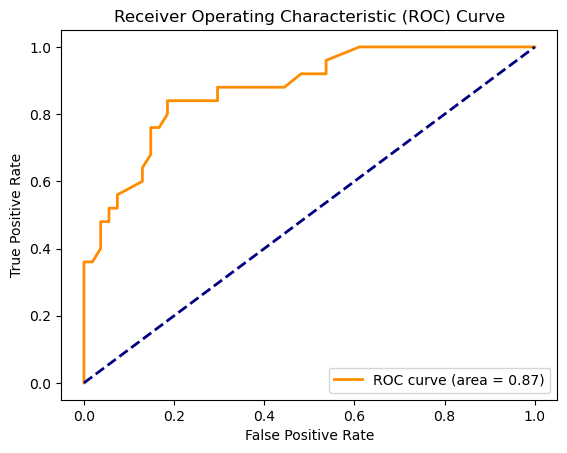


GBDT Metrics:
Accuracy: 0.7722
Precision: 0.7059
Recall: 0.4800
F1-score: 0.5714


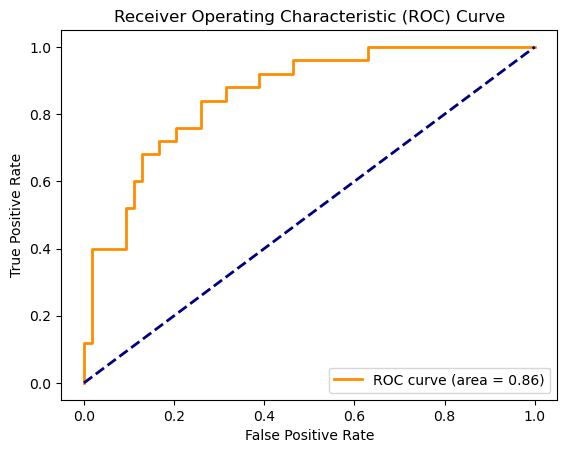


XGBoost Metrics:
Accuracy: 0.8228
Precision: 0.7619
Recall: 0.6400
F1-score: 0.6957


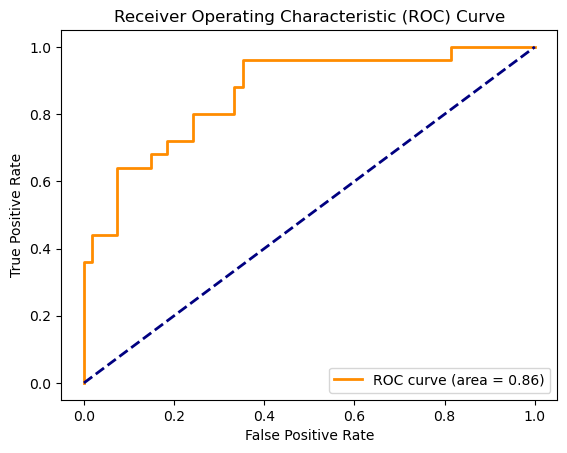

In [16]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
compute_metrics_and_plot(rf_model, X_test, y_test, "Random Forest")

# Train Gradient Boosting Decision Trees (GBDT)
gbdt_model = GradientBoostingClassifier(random_state=0)
gbdt_model.fit(X_train, y_train)
compute_metrics_and_plot(gbdt_model, X_test, y_test, "GBDT")

# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=0,learning_rate=0.3)
xgb_model.fit(X_train, y_train)
compute_metrics_and_plot(xgb_model, X_test, y_test, "XGBoost")


# Part 2: Using k-fold Cross Validation 

When the data is scewed, the accuracy and other metrics may not be reliable for a small testing set like in part 1. To mitigate overfitting or underfitting accuracy, we use 4-fold Cross Validation to come up with more accurate metrics for our classifiers from part 1.

In [17]:

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=0)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Random Forest 5-Fold CV Accuracies:", cv_scores)
print("Mean Accuracy:", cv_scores.mean(),'\n')

# Train Gradient Boosting Decision Trees (GBDT)
gbdt_model = GradientBoostingClassifier(random_state=0)
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print(f"GBDT 5-Fold CV Accuracies:", cv_scores)
print("Mean Accuracy:", cv_scores.mean(),'\n')

# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=0)
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print(f"XGBoost 5-Fold CV Accuracies:", cv_scores)
print("Mean Accuracy:", cv_scores.mean(),'\n')

Random Forest 5-Fold CV Accuracies: [0.81012658 0.70886076 0.79487179 0.82051282 0.82051282]
Mean Accuracy: 0.7909769555339174 

GBDT 5-Fold CV Accuracies: [0.83544304 0.70886076 0.74358974 0.82051282 0.82051282]
Mean Accuracy: 0.7857838364167478 

XGBoost 5-Fold CV Accuracies: [0.7721519  0.72151899 0.76923077 0.85897436 0.79487179]
Mean Accuracy: 0.7833495618305745 



# Part 3: Using GridSearch Cross Validation of models



GridSearchCV is an algorithm that iteratively changes the hyperparameters of a model, then uses cross validation to evaluate which is the best model. Here are the resulting metrics for the best model, with the parameters decided by GridSearchCV

### 3.1) Redefine the function compute_metrics_and_plot() to support the tuned models

In [20]:
# Function to compute metrics and plot ROC curve
def compute_metrics_and_plot(model, X_test, y_test, name, filename):
    print(f"\n{name} with Best Params Metrics:")
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}\n")   
    # Compute ROC curve and ROC area for each class
    y_scores = model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC of {name}')
    plt.legend(loc="lower right")
    plt.show()


### 3.2) Run GridSearchCV to derive best hyperparameters for each model

Best parameters for Random Forest: {'max_depth': 6}

Tuned Random Forest with Best Params Metrics:
Accuracy: 0.7722
Precision: 0.6667
Recall: 0.5600
F1-score: 0.6087



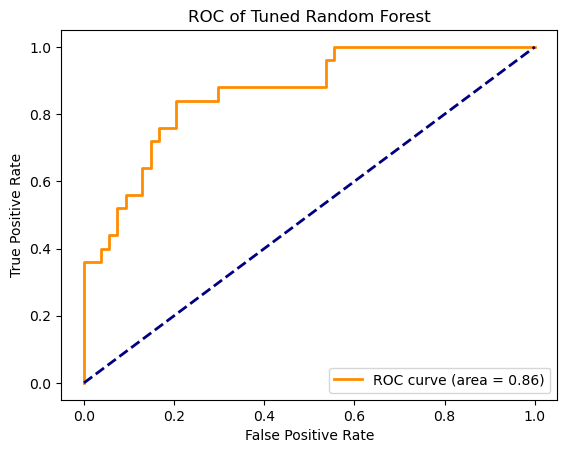

Best parameters for GBDT: {'learning_rate': 0.2, 'max_depth': 3}

Tuned Gradient Boost Trees with Best Params Metrics:
Accuracy: 0.7975
Precision: 0.7647
Recall: 0.5200
F1-score: 0.6190



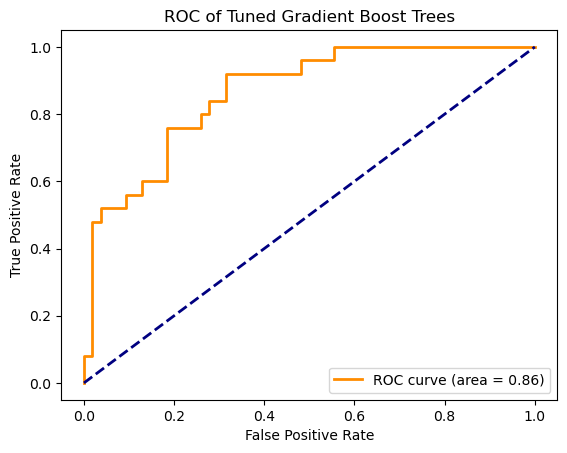

Best parameters for XGBoost: {'max_depth': 6}

Tuned XGBoost with Best Params Metrics:
Accuracy: 0.8228
Precision: 0.7619
Recall: 0.6400
F1-score: 0.6957



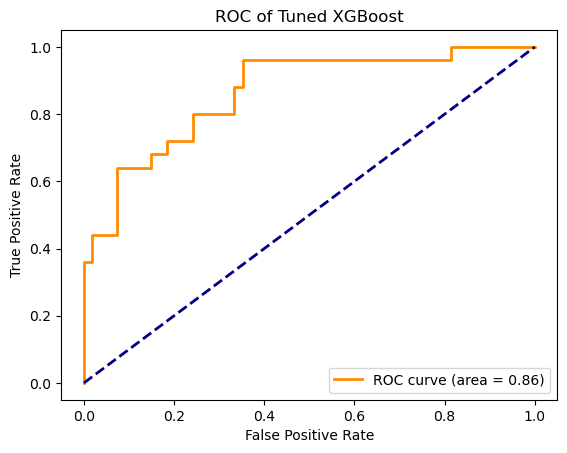

In [21]:

# GridSearchCV for Random Forest
rf_params = {
            'max_depth': [3, 4, 5, 6]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("Best parameters for Random Forest:", rf_grid.best_params_)
compute_metrics_and_plot(best_rf, X_test, y_test, "Tuned Random Forest","RanF")

# GridSearchCV for Gradient Boosting Decision Trees (GBDT)
gbdt_params = {
               'learning_rate': [0.01, 0.1, 0.2, 0.3],
               'max_depth': [3, 4, 5, 6]}
gbdt_grid = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=gbdt_params, cv=5)
gbdt_grid.fit(X_train, y_train)
best_gbdt = gbdt_grid.best_estimator_
print("Best parameters for GBDT:", gbdt_grid.best_params_)
compute_metrics_and_plot(best_gbdt, X_test, y_test, "Tuned Gradient Boost Trees","GBDT")

# GridSearchCV for XGBoost Classifier
xgb_params = {
              'max_depth': [3, 4, 5, 6]}
xgb_grid = GridSearchCV(XGBClassifier(random_state=0, learning_rate=0.3), param_grid=xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print("Best parameters for XGBoost:", xgb_grid.best_params_)
compute_metrics_and_plot(best_xgb, X_test, y_test, "Tuned XGBoost","XGB")



It appears that XGBoost with the listed parameters above is the most optimal classifier for the diabetes dataset.